# Basic GPS Timeseries Analysis

Goals:

1) Where to access time series data

2) Fit linear rate to single station

3) Download and apply MIDAS fits

4) Plot map of interseismic velocities

5) Fit 9-parameter model of Bevis & Brown 2014

6) Plot max seasonal amplitude for all stations in northern south america

## 1) Where to access data

In [2]:
from IPython.display import Image
Image(url='http://geodesy.unr.edu/images/magnet-station-header.gif')

#### University of Nevada Reno Geodetic Laboratory Data

UNR has a great [website](http://geodesy.unr.edu) that provides GPS daily solution time series from a variety of different agencies including the UNAVCO database and many others. What makes their interface really slick is a simple [world map](http://geodesy.unr.edu/billhammond/gpsnetmap/GPSNetMap.html) to browse stations, or a [huge list page](http://geodesy.unr.edu/NGLStationPages/GlobalStationList) in case you know the name of a station already. Details on processing can be found [here](http://geodesy.unr.edu/gps/ngl.acn)

In [1]:
import pandas as pd
import os
os.environ['UNGL_DATA'] = '/Volumes/OptiHDD/data/GPS/unevada/'
import gps_functions as gps
%matplotlib inline

In [2]:
dfS = gps.load_stations()
dfS.head()

,site,lat,lon,height
0,00NA,-12.466640,-229.156013,104.851046
1,01NA,-12.478224,-229.017953,105.408565
2,02NA,-12.355923,-229.118271,117.652472
3,1LSU,30.407425,-91.180262,-6.486555
4,1NSU,31.750800,-93.097604,28.070886


In [3]:
dfM = gps.load_midas()
dfM.head()

,site,version,start,end,years,epochs,epochs_good,pairs,east,north,...,e0,n0,u0,out_e,out_n,out_u,sig_e,sig_n,sig_u,nsteps
0,00NA,MIDAS4,2008.2355,2016.5585,8.3230,2549,2549,4473,0.035729,0.058466,...,0.000114,0.001188,0.013870,0.077,0.059,0.086,0.002927,0.003121,0.009111,0
1,01NA,MIDAS4,2008.2683,2013.6126,5.3443,1490,1490,2393,0.035928,0.059259,...,-0.000416,0.002677,-0.015972,0.078,0.084,0.080,0.002845,0.002589,0.009765,0
2,02NA,MIDAS4,2008.7255,2016.3313,7.6058,1836,1836,3306,0.035984,0.059591,...,-0.004251,0.001584,-0.006607,0.083,0.067,0.077,0.002617,0.002923,0.008713,0
3,1LSU,MIDAS4,2003.3073,2016.5749,13.2676,4339,3986,5213,-0.012547,-0.000285,...,0.001566,-0.004303,-0.010141,0.054,0.062,0.070,0.004197,0.003199,0.009805,5
4,1NSU,MIDAS4,2004.0411,2016.5777,12.5366,4139,4083,6137,-0.013201,-0.000218,...,-0.002851,0.001326,-0.000448,0.069,0.057,0.058,0.002329,0.002312,0.008883,2


In [7]:
#Download the data
station = 'BOGA'
#filename = gps.download_data(station)
filename = 'BOGA.IGS08.tenv3'
df = gps.load_tenv3(filename)
df.head()

,site,date,decyear,mjd,week,day,reflon,e0,east,n0,north,u0,up,ant,sig_e,sig_n,sig_u,corr_en,corr_eu,corr_nu
date,,,,,,,,,,,,,,,,,,,,
2000-02-09,BOGA,00FEB09,2000.1068,51583,1048,4,-74.1,2224,0.662233,512929,0.850517,2610,0.608414,1.372,0.000550,0.000471,0.002045,0.017450,0.042418,0.025193
2000-02-10,BOGA,00FEB10,2000.1095,51584,1048,5,-74.1,2224,0.663889,512929,0.851351,2610,0.601089,1.372,0.000587,0.000479,0.002144,-0.003191,0.098642,0.021437
2000-02-11,BOGA,00FEB11,2000.1123,51585,1048,6,-74.1,2224,0.657851,512929,0.855242,2610,0.604409,1.372,0.000551,0.000466,0.002029,-0.016198,0.060011,0.010122
2000-02-12,BOGA,00FEB12,2000.1150,51586,1048,7,-74.1,2224,0.658042,512929,0.853225,2610,0.615785,1.372,0.000649,0.000512,0.002243,0.002860,0.067785,0.006470
2000-02-13,BOGA,00FEB13,2000.1177,51587,1049,1,-74.1,2224,0.661059,512929,0.851115,2610,0.598394,1.372,0.000557,0.000476,0.002089,0.002274,0.086683,0.006663


In [12]:
#dfSteps = gps.load_steps() #entire database
dfSteps = gps.load_steps(station)
dfSteps.head()

,site,date,code,thresh_d,distance,mag,id
date,,,,,,,
1997-09-02,BOGA,97SEP02,2,398.107,204.853,6.8,usp000871m
1997-12-11,BOGA,97DEC11,2,251.189,205.075,6.4,usp0008cf7
2001-06-23,BOGA,01JUN23,2,2511.886,2324.885,8.4,usp000ah4q
2004-11-15,BOGA,04NOV15,2,630.957,379.969,7.2,usp000d8gx
2008-05-24,BOGA,08MAY24,2,141.254,49.039,5.9,usp000g7p6


## 2) Fit linear rate to single station


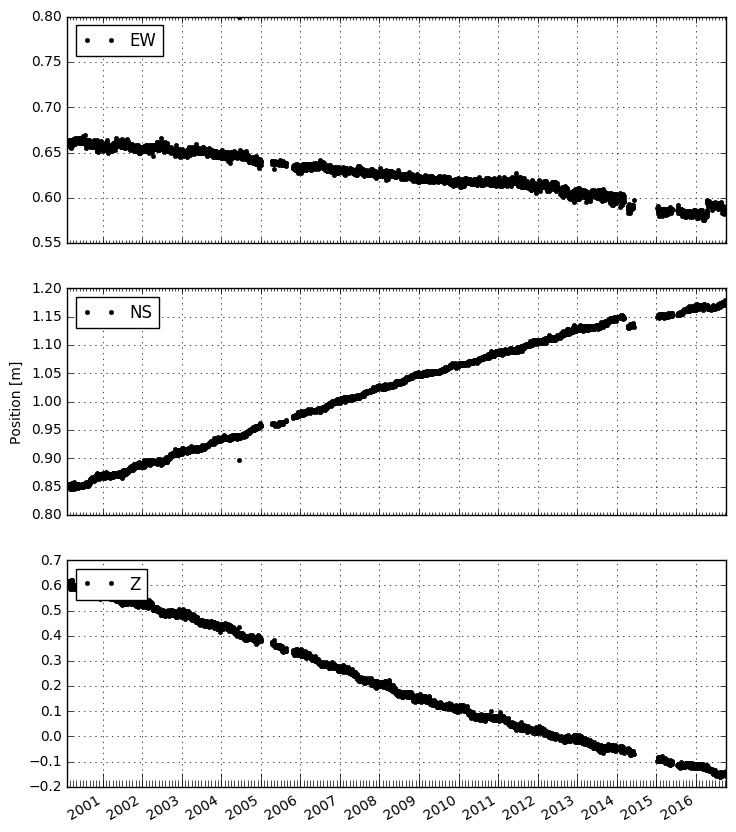

In [8]:
#Plot the data
gps.plot_all(df)

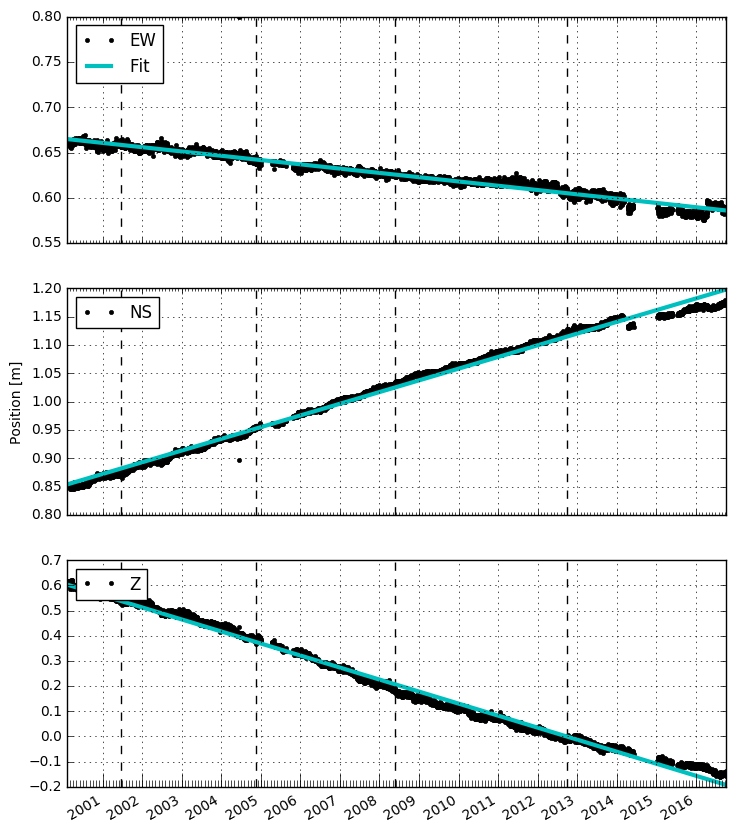

In [13]:
dfFit = gps.fit_linear(df)
gps.plot_all(df, dfFit=dfFit, dfSteps=dfSteps)#, dfMidas=dfM)
#gps.plot_all(df, dfMidas=dfM)
#gps.plot_all(df, dfSteps=dfSteps)
#dfFit.head()

## 3) Apply MIDAS insterseismic velocities

In [18]:
# Extract stations in Colombia
subset = dfS.query('(0.0 < lat < 12) and (-79 < lon < -71)') #Extend East to get subandes stations
df = pd.merge(dfM, subset, how='inner', on=['site'])
df

,site,version,start,end,years,epochs,epochs_good,pairs,east,north,...,out_e,out_n,out_u,sig_e,sig_n,sig_u,nsteps,lat,lon,height
0,ABCC,MIDAS4,2010.0014,2015.4086,5.4072,1431,1430,1752,-0.004368,0.014481,...,0.005,0.011,0.042,0.006665,0.004578,0.009605,1,4.661234,-74.126922,2576.567845
1,ABPD,MIDAS4,2010.0014,2015.4086,5.4072,1472,1471,1897,-0.000129,0.015172,...,0.047,0.056,0.027,0.003475,0.002751,0.008454,1,4.476566,-74.098868,2958.472092
2,ABPW,MIDAS4,2010.0014,2015.4086,5.4072,1439,1438,1884,-0.000645,0.014824,...,0.062,0.058,0.032,0.003467,0.002647,0.009787,1,4.689569,-73.995115,2837.103155
3,AGCA,MIDAS4,2012.3915,2015.9069,3.5154,941,827,1060,0.007276,0.012951,...,0.059,0.059,0.065,0.004021,0.003229,0.011338,1,8.315047,-73.595419,200.902255
4,AGU1,MIDAS4,2010.3135,2012.3723,2.0588,592,592,592,0.006556,0.014253,...,0.042,0.054,0.054,0.003385,0.002922,0.010967,0,8.315225,-73.595364,201.574642
5,ALB3,MIDAS4,2012.8268,2015.4086,2.5818,790,727,813,0.005430,0.014443,...,0.064,0.070,0.063,0.004343,0.003737,0.013948,1,7.760519,-73.389436,132.580006
6,ALPA,MIDAS4,2015.0007,2016.1615,1.1608,335,115,115,0.002672,0.012509,...,0.035,0.070,0.017,0.002470,0.002108,0.007140,0,11.527984,-72.917757,1.818209
7,APTO,MIDAS4,2007.8330,2016.5339,8.7009,1694,1229,1301,0.014295,0.012405,...,0.055,0.055,0.068,0.002813,0.002904,0.009433,6,7.877787,-76.632391,45.205732
8,BEJ1,MIDAS4,2012.9336,2016.5339,3.6003,939,836,889,0.004648,0.015747,...,0.097,0.048,0.061,0.004509,0.003085,0.011399,1,7.060636,-73.875592,93.537896
9,BER1,MIDAS4,2007.3703,2016.5339,9.1636,2415,2219,3287,0.004673,0.014289,...,0.054,0.033,0.058,0.004067,0.004521,0.015161,2,6.492684,-74.410309,159.054596


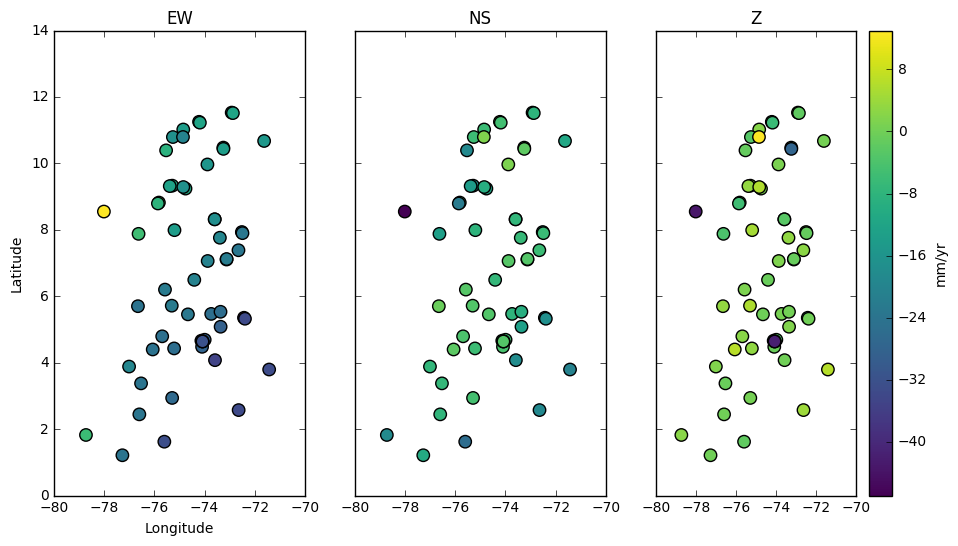

In [27]:
# Plot these on a map
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'viridis'

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(11,6), sharex=True, sharey=True)
s = 80
ax1.scatter(df.lon, df.lat, s=s, c=df.east)
ax1.set_title('EW')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax2.scatter(df.lon, df.lat, s=s, c=df.north)
ax2.set_title('NS')
s = ax3.scatter(df.lon, df.lat, s=s, c=df.up*1e3)
ax3.set_title('Z')
cb = plt.colorbar(s)
cb.set_label('mm/yr')

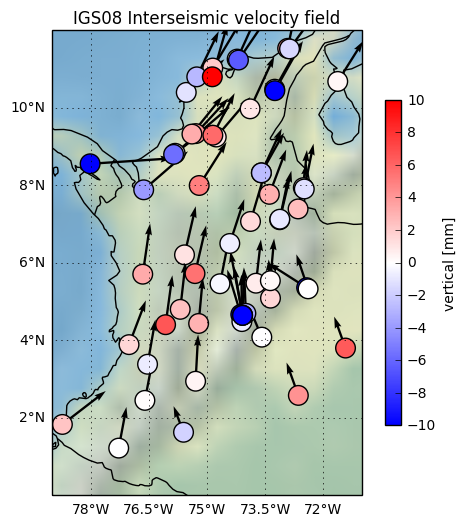

In [35]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import LocatedImage
from cartopy.io.shapereader import Reader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig, ax = plt.subplots(1,1,figsize=(6,6))
ax = plt.axes(projection=ccrs.PlateCarree())
sc = plt.scatter(df.lon, df.lat, c=df.up*1e3, s=200, 
                 norm=None,
                 vmin=-10,
                 vmax=10,
                 cmap=plt.cm.bwr, #linear scale 
                 #cmap=plt.cm.bwr, #symmetric scale
                 transform=ccrs.Geodetic(),
                 zorder=2,
                 )
plt.quiver(df.lon, df.lat, df.east, df.north, scale=0.1, transform=ccrs.PlateCarree(), color='k', zorder=1) # bigger arrows
cb = plt.colorbar(sc, orientation='vertical', shrink=0.7)
cb.set_label('vertical [mm]')
ax.stock_img()
ax.set_extent([-79, -71, 0, 12])
ax.coastlines('50m')
borders = cfeature.BORDERS
borders.scale='50m'
ax.add_feature(borders)
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.title('IGS08 Interseismic velocity field')

### Ways to extend analysis:
This demo just scratches the surface of things you can do with GPS data! Here are some ideas:

* Grid the GPS data and produce strain maps (see Hackl and Allmendinger Papers)
* Fit more complicated models to time series (see Bevis & Brown 2014)
* Compare vertical seasonal displacements with GRACE data
    * http://geoid.colorado.edu/grace/dataportal.html
* 

In [ ]:
# Determine distances with cartopy
#from cartopy.geodesic import Geodesic
#geod = Geodesic() #default ellipsoid
#dutur = np.asarray(geod.inverse( (-70.769, -19.610), (-67.205542,-22.242005) )).T #distance and azimuths
# NOTE distance in meters, azimuth is degrees clockwise from north

## 4) OSU Fit

In [ ]:
components = ['up', 'east', 'north']
#components = ['up']

#df = gps.load_tenv3(site+'.IGS08.tenv3')
#df = df.ix['2010-04-15':'2015-03-10']
df = gps.cull_outliers(df, cols=components) #get rid of really bogus points before fit


for comp in components:
    print('fitting {}...'.format(comp))
    # Fit OSU Model
    t0 = df.decyear[0] # intial time [yr]
    x0 = df[comp][0] # initial position [m]
    v = (df[comp][-1] - df[comp][0]) / (df.decyear[-1] - df.decyear[0])  # trend [m/yr]
    b = 0.  # step jump offset [m]
    #tj = 2014.2478 #step jump time [yr] of pisagua EQ #time found above
    s1 = s2 = c1 = c2 = 0.01 # fourier coefficients [m]
    T1 = 1 # fourier period 1 [yr]
    T2 = 0.5 #fourier period 2 [yr]
    guess = [t0,x0,v,b,tj,s1,c1,s2,c2,T1,T2]

    try:
        fit,popt,rmse = gps.myfit(x=df['decyear'], y=df[comp], F=gps.osu, guess=guess)
        df['fit_'+comp] = fit
        DF.loc[(site,comp),:] = np.append(popt,rmse)
    except Exception as e:
        print(e)
        df['fit_'+comp] = gps.osu(df.decyear.values, *guess) #plot initial guess
        pass

dfFit = df.ix[:, ['fit_up','fit_north','fit_east']]
gps.plot_all(df, dfSteps=dfSteps, dfFit=dfFit)
#plt.suptitle(site)
plt.savefig('BOGA_OSU.pdf', bbox_inches='tight')